# CODESOFT
      Name: Edupunoor Chitrala Greeshma 
      Batch: Nov Batch A18 
      Role: Data Science

# Task1: TITANIC SURVIVAL PREDICTION

# Importing Required Libraries

In [3]:
# For Data Preprocessing 
import pandas as pd
import numpy as np
# For Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
# For Model Training
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB

# Importing Data

In [4]:
titanic_data = pd.read_csv("titanic_data.csv")

# Understanding Data

In [5]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
titanic_data['Cabin'].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [11]:
titanic_data['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [12]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [13]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

# Data Cleaning 

In [24]:
null_values_check = titanic_data.isnull().sum().sort_values(ascending = False)
null_values_check

Age            86
Fare            1
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Ticket          0
Embarked        0
dtype: int64

In [22]:
# cabin data has 327 null values 
titanic_data.drop("Cabin",axis='columns',inplace = True)

In [26]:
# Age column to average (null values)
# Fare column to min (null values)
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].min(),inplace=True)

In [27]:
# now again checking null values 
null_values_check = titanic_data.isnull().sum().sort_values(ascending = False)
null_values_check

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
titanic_data['Ticket'] = pd.to_numeric(titanic_data['Ticket']
                                      ,errors = 'coerce')

In [30]:
titanic_data.shape

(418, 11)

In [33]:
drop_duplicates = titanic_data.drop_duplicates(
    subset = ['PassengerId'])

In [34]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       296 non-null    float64
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(3), int64(5), object(3)
memory usage: 36.1+ KB


In [35]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,2.960000e+02,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,2.238510e+05,35.541956
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,3.695238e+05,55.867684
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,6.800000e+02,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,1.747225e+04,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,2.301360e+05,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,3.470815e+05,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,3.101298e+06,512.329200


In [36]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911.0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272.0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276.0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154.0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298.0,12.2875,S


# Insights:
1. Identified number of null and non null values
2. Dropped null values in cabin column
3. Filled with average values for Age column and Minimum values for Fare column
4. Coverted ticket column values to numeric
5. Checked for duplicate rows#

# EDA

Text(0.5, 1.0, 'survived vs sex')

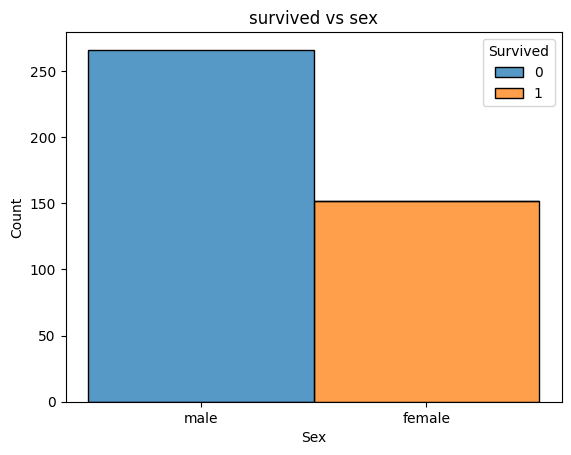

In [59]:
sns.histplot(data = titanic_data, x= 'Sex',hue = 'Survived', multiple = 'stack')
plt.title("survived vs sex")

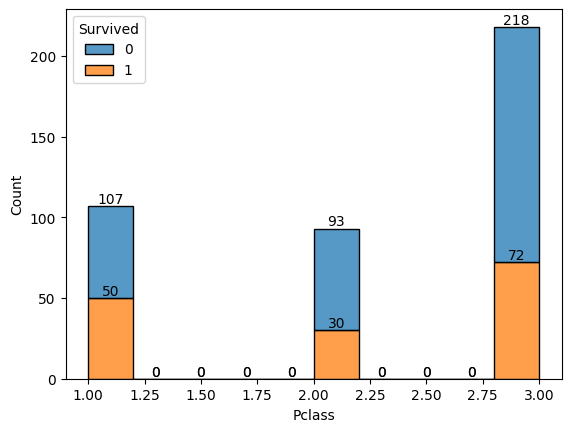

In [52]:
a = sns.histplot(data = titanic_data, x= 'Pclass',hue = 'Survived',multiple = 'stack')
for i in a.containers:
    a.bar_label(i,)

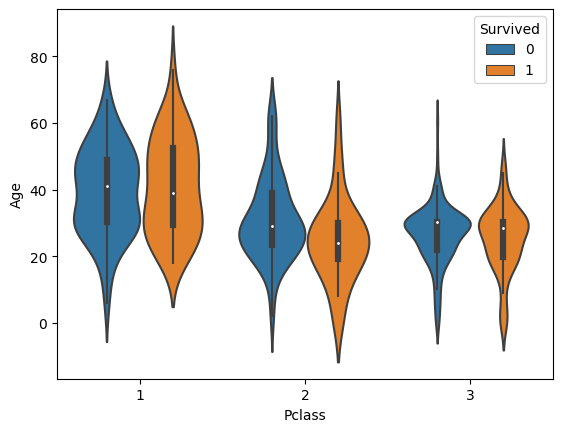

In [55]:
a = sns.violinplot(data = titanic_data,x = 'Pclass',y = 'Age',hue = 'Survived')
for i in a.containers:
    a.bar_label(i,)
    
    


C:\Users\GREESHMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


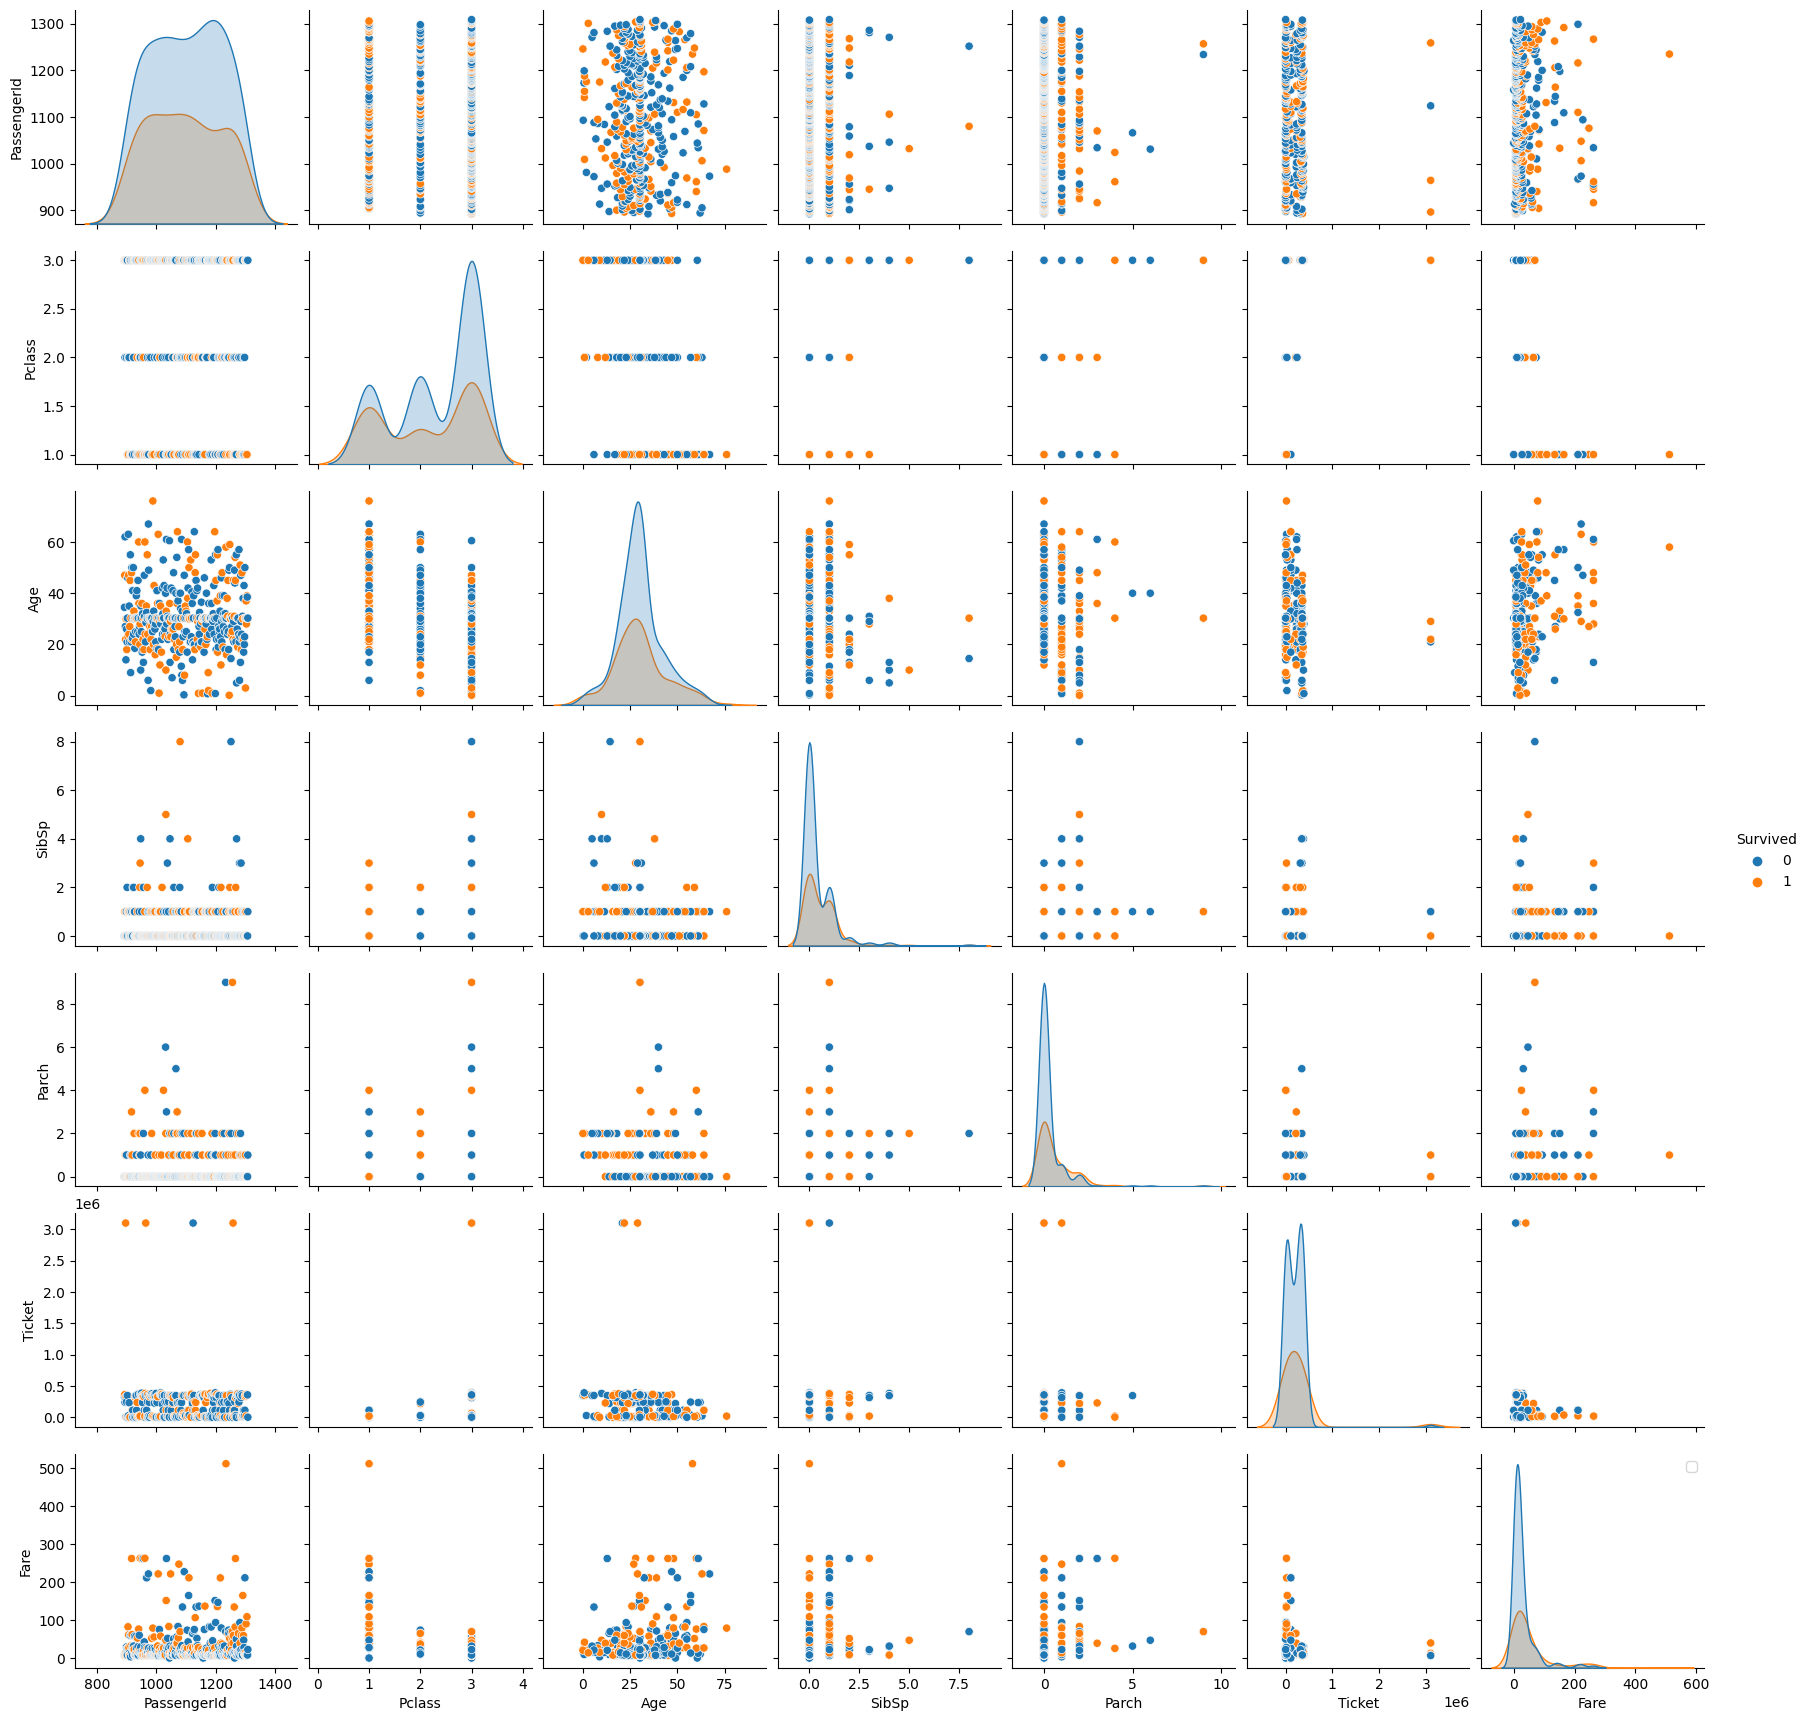

In [58]:
sns.pairplot(data=titanic_data,hue='Survived')
plt.legend()

# Insights:
1. Plots were plotted based on survial
2. From 1st graph it is clear that males were dead in large number compare to Females
3. From 2nd graph I can say 3rd Passanger class people were dead more compare to 2nd and 1st class Passengers 
4. From 3rd graph I can say people who are onboard are in age group 25-60 among all classes
5. Compared each component with each other component in dataset and again insights

# Model Training
Selected Feature and Target columns and training and splitting dataset¶

In [63]:
# Selecting Feature and target columns
Feature = titanic_data.drop(['Survived','Sex','Name','Ticket','Embarked'],axis = 1)
Target = titanic_data['Survived']

In [67]:
X_train,X_test,y_train,y_test = train_test_split(Feature,Target,test_size=0.2,random_state=42)

In [68]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare
336,1228,2,32.00000,0,0,13.0000
31,923,2,24.00000,2,0,31.5000
84,976,2,30.27259,0,0,10.7083
287,1179,1,24.00000,1,0,82.2667
317,1209,2,19.00000,0,0,10.5000
...,...,...,...,...,...,...
71,963,3,21.00000,0,0,7.8958
106,998,3,21.00000,0,0,7.8208
270,1162,1,46.00000,0,0,75.2417
348,1240,2,24.00000,0,0,13.5000


In [69]:
y_train

336    0
31     0
84     0
287    0
317    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Survived, Length: 334, dtype: int64

# Accuracy

As it is a classification model,we tried with some of the most prominet classification algorithms to find which classifier is best

# 1. Random Forest Classifier

In [80]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)

y_predicition = random_forest.predict(X_test)

random_forest.score(X_train,y_train) 
acc_random_forest = round(random_forest.score(X_train,y_train)*100,20
                         )

# 2. Logistic Regression

In [89]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_prediction = log_reg.predict(X_test)

log_reg.score(X_train,y_train)
acc_log = round(log_reg.score(X_train,y_train)*100,2)


# 3. K Nearest Neighbours

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_prediction = knn.predict(X_test)

knn.score(X_train,y_train)
acc_knn = round(knn.score(X_train,y_train)*100,2)

# 4. Support Vector Machine

In [94]:
linear_svc = LinearSVC()
linear_svc.fit(X_train,y_train)

y_prediction = linear_svc.predict(X_test)

linear_svc.score(X_train,y_train)
acc_linear_svc = round(linear_svc.score(X_train,y_train)*100,2)

C:\Users\GREESHMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\GREESHMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 5. Decision Tree classifier

In [95]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

y_prediction = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train,y_train)*100,2)

# Finding out which is best classifier  based on accuracy

In [99]:
result = pd.DataFrame(
{
    'Model':['Support Vector Machine','KNN','Logistic Regression',
            'Random Forest','Decision Tree'],
    'Score':[acc_linear_svc,acc_knn,acc_log,
            acc_random_forest,acc_decision_tree]

})

result_df = result.sort_values(by='Score',ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
77.25,KNN
65.27,Logistic Regression
35.33,Support Vector Machine


<Axes: xlabel='Score', ylabel='Model'>

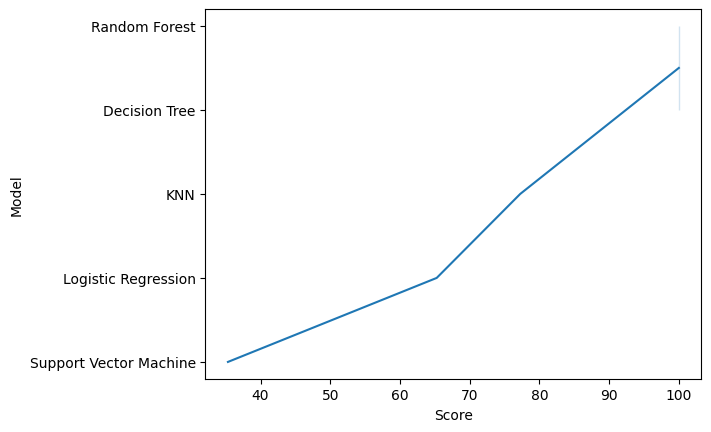

In [101]:
sns.lineplot(x ='Score',y='Model',data=result_df)

# Conslusion
    1. People who died were mostly Males
    2. People mostly died are from passenger 3rd class followed by 2nd and 2st class
    3. Boardedpeople are in age gropu 20-60 in all  classes
    4. Random Forest and Decision Tree are best algorithms based on score values for Titanic dataset
    